<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# TMDB Data Exploration
### <i>By Sum-Ye Nim</i>

### Table Of Contents:
* [Data Wrangling](#1)
* [Exploratory Data Analysis](#2)
* [Conclusions](#3)

The aim of this workbook is to perform Exploratory Data Analysis on the TMDB movie dataset to draw out insights.

In [30]:
# First, import the modules we need

import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling <a class="anchor" id="1"></a>

In [36]:
# Create a dataframe called df and read in the csv 
df = pd.read_csv('TMDB_movies.csv')

### General Properties <a class="anchor" id="1.1"></a>

Start looking at the data structure.

In [40]:
pd.set_option('display.max_columns', None)
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [42]:
# find the number of rows and columns
df.shape

(4803, 20)

There are 4803 rows and 20 columns.

In [45]:
# look at the column headers
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [47]:
# find the data types of the columns
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

### Data Cleaning and Transformation <a class="anchor" id="1.2"></a>

#### Duplication <a class="anchor" id="1.2.1"></a>

Check for duplicated rows.

In [52]:
sum(df.duplicated())

0

The results indicate no duplicated rows.

Check for the number of unique values per column.

In [56]:
df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

It is expected that id, original_title, ovrview, and title have 4803 unique values. Let's explore that further.

In [59]:
# find where there is more than 1 of the same 'original_title'
dup_orig_title = df.groupby('original_title')[['id']].count()
dup_orig_title[dup_orig_title['id'] > 1].copy()

,id
original_title,
Batman,2
Out of the Blue,2


Batman and Out of the Blue are indicated to be duplicated, with two entries each. Let's check.

In [62]:
# apply a mask to find the Batman and Out of the Blue original_titles
df[(df.original_title == 'Batman') | (df.original_title == 'Out of the Blue')]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


From the above table we can see that though the original titles are the same, the rest of the row is not, therefore there is no duplication.

Oddly, the number of original titles and titles do not match. Let's look into titles further.

In [66]:
# find where there is more than 1 of the same 'title'
dup_title = df.groupby('title')[['id']].count()
dup_title[dup_title['id'] > 1].copy()

,id
title,
Batman,2
Out of the Blue,2
The Host,2


Batman and Out of the Blue are expected, but The Host is new. We can explore that further.

In [69]:
# apply a mask to find The Host movie title
df[df.title == 'The Host']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will be one of us,The Host,6.0,1817
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537


The Host did not show up as duplicated for the original_title as one entry was in English and the other in Korean. From looking at the table, there is no duplication for this movie.

As indicated when looking at the number of unique values in the columns, performed above, the status column has three unique values.

#### Column Transformations <a class="anchor" id="1.2.2"></a>

In [74]:
# find unique values for status column
df.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [76]:
# find number of each
df.status.value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

The status values seem like categories. We can change the column data type to category.

In [79]:
# change data type to category
df['status'] = df['status'].astype('category')

In [81]:
# check data types
df.dtypes

budget                     int64
genres                    object
homepage                  object
id                         int64
keywords                  object
original_language         object
original_title            object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                  float64
spoken_languages          object
status                  category
tagline                   object
title                     object
vote_average             float64
vote_count                 int64
dtype: object

Let's take a closer look at the columns where there seem to be lists in each row.

In [84]:
df.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

This column seems to have lists of dictionaries but with the data type string. Let's convert to a list for later use.

In [87]:
# code from Alex Caian, Digital Futures

# Function to extract genres for each datapoint
import ast ## This module can be used to evaluate literals, eg: transform string-lists back into lists
def extract_genres(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Genres

As all the lists in the columns we are looking at have a key called 'name' in, we can apply this function to all the columns we're interested in.

In [90]:
## Apply the function to all the columns we're interested in
df['extracted_genres'] = df['genres'].apply(extract_genres)
df['extract_production_comp'] = df['production_companies'].apply(extract_genres)
df['extract_production_countries'] = df['production_countries'].apply(extract_genres)
df['extract_spoken_languages'] = df['spoken_languages'].apply(extract_genres)
df['extract_keywords'] = df['keywords'].apply(extract_genres)

Change the release_date column to a datetime data type.

In [93]:
# Change the release_date column to a datetime data type
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

budget                                   int64
genres                                  object
homepage                                object
id                                       int64
keywords                                object
original_language                       object
original_title                          object
overview                                object
popularity                             float64
production_companies                    object
production_countries                    object
release_date                    datetime64[ns]
revenue                                  int64
runtime                                float64
spoken_languages                        object
status                                category
tagline                                 object
title                                   object
vote_average                           float64
vote_count                               int64
extracted_genres                        object
extract_produ

Drop the columns we just extracted lists from.

In [96]:
# create a new dataframe
df_n = df.copy()

# drop the unecessary columns
df_n.drop(columns=['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'], inplace=True)

#### Check for Nulls <a class="anchor" id="1.2.3"></a>

In [99]:
# look at the non-null count per column
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        4803 non-null   int64         
 1   homepage                      1712 non-null   object        
 2   id                            4803 non-null   int64         
 3   original_language             4803 non-null   object        
 4   original_title                4803 non-null   object        
 5   overview                      4800 non-null   object        
 6   popularity                    4803 non-null   float64       
 7   release_date                  4802 non-null   datetime64[ns]
 8   revenue                       4803 non-null   int64         
 9   runtime                       4801 non-null   float64       
 10  status                        4803 non-null   category      
 11  tagline                       

There seem to be a lot of nulls in the homepage and tagline columns, with a few nulls in overview, release_date, and runtime too.

In [102]:
# look at the number of nulls per column
df_n.isnull().sum()

budget                             0
homepage                        3091
id                                 0
original_language                  0
original_title                     0
overview                           3
popularity                         0
release_date                       1
revenue                            0
runtime                            2
status                             0
tagline                          844
title                              0
vote_average                       0
vote_count                         0
extracted_genres                   0
extract_production_comp            0
extract_production_countries       0
extract_spoken_languages           0
extract_keywords                   0
dtype: int64

It's okay if homepage and tagline are null as not every movie may have a a homepage or a tagline. We are not interested in these columns for analysis. Let's drop the columns.

In [105]:
# drop homepage and tagline
df_n.drop(columns=['homepage', 'tagline'], inplace=True)

It is not necessary to drop the overview column as it has very few nulls, but the column is also one that we are not interested in analysing, therefore we will drop it.

In [108]:
# drop overview
df_n.drop(columns=['overview'], inplace=True)

Next, let's look at release_date and runtime.

In [111]:
# apply mask to find nulls in release_date and runtime
df_n[(df_n['release_date'].isnull()) | (df_n['runtime'].isnull())]

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,extracted_genres,extract_production_comp,extract_production_countries,extract_spoken_languages,extract_keywords
2656,15000000,370980,it,Chiamatemi Francesco - Il Papa della gente,0.738646,2015-12-03,0,NaN,Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,[Drama],[Taodue Film],[Italy],[Español],"[pope, biography]"
4140,2,459488,en,"To Be Frank, Sinatra at 100",0.050625,2015-12-12,0,NaN,Released,"To Be Frank, Sinatra at 100",0.0,0,[Documentary],[Eyeline Entertainment],[United Kingdom],[],"[music, actors, legendary perfomer, classic ho..."
4553,0,380097,en,America Is Still the Place,0.000000,NaT,0,0.0,Released,America Is Still the Place,0.0,0,[],[],[],[],[]


These rows make up a small portion of the data. We will drop the rows.

In [114]:
# drop the rows with nulls in release_date and runtime
df_n.dropna(
    axis = 0, # default (rows)
    how = 'any', # default 
    subset = ['runtime', 'release_date'],   # subset tells dropna which columns to consider
    inplace = True # makes change permanent
)

In [116]:
# Check rows and columns
df_n.shape

(4800, 17)

We now have 4800 rows and 17 columns.

## Exploratory Data Analysis <a class="anchor" id="2"></a>

Let's describe the data.

In [121]:
df_n.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4800.000000,4800,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,56949.011667,21.505569,2002-12-26 00:29:24,8.231205e+07,106.898125,6.094458,690.646875
min,0.000000e+00,5.000000,0.000372,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.750000,4.682212,1999-07-12 18:00:00,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.500000,12.928897,2005-09-30 12:00:00,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58512.500000,28.350628,2011-02-14 12:00:00,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,447027.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000
std,4.073029e+07,88292.839372,31.822163,NaN,1.628950e+08,22.561593,1.188366,1234.852449


The minimum values for budget, revenue, and runtime look odd. In the context of movies, 0 values are implausible.

### Zeros <a class="anchor" id="2.2"></a>

Let's count the number of zeros and produce a plot to show them per column.

In [126]:
# count number of zeros per column
count_zeros = df_n.isin([0]).sum(axis=0)
count_zeros.sort_values(ascending=False, inplace=True)

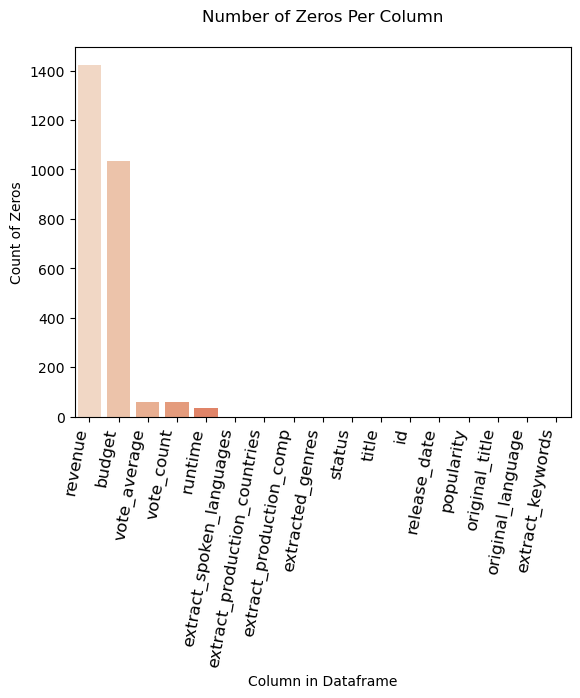

In [238]:
# produce a barplot

sns.barplot(x= count_zeros.index,
            y = count_zeros.values,
             palette = 'rocket_r')

plt.xticks(rotation=80,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.xlabel('Column in Dataframe')
plt.ylabel('Count of Zeros')

plt.title('Number of Zeros Per Column\n')

#plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight') # saving the image to the working directory

plt.show()

In [130]:
count_zeros

revenue                         1424
budget                          1036
vote_average                      61
vote_count                        60
runtime                           34
extract_spoken_languages           0
extract_production_countries       0
extract_production_comp            0
extracted_genres                   0
status                             0
title                              0
id                                 0
release_date                       0
popularity                         0
original_title                     0
original_language                  0
extract_keywords                   0
dtype: int64

There are 4800 rows in this data. Over 25% of the data has zeros where zeros are quite unexpected. A film's budget, revenue, and runtime are unlikely to be 0.

Let's look at two films with a budget/revenue of zero and compare that to budget/revenue data found on the web.

In [134]:
df_n[(df_n['original_title'] == 'The Cat in the Hat') | (df_n['original_title'] == 'Arthur Christmas') ]

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,extracted_genres,extract_production_comp,extract_production_countries,extract_spoken_languages,extract_keywords
265,0,10588,en,The Cat in the Hat,18.251129,2003-11-21,0,82.0,Released,The Cat in the Hat,4.9,366,"[Comedy, Fantasy, Family]","[Imagine Entertainment, DreamWorks SKG, Univer...",[United States of America],[English],"[cat, brother sister relationship, boredom, ch..."
406,0,51052,en,Arthur Christmas,19.836830,2011-02-22,0,97.0,Released,Arthur Christmas,6.7,333,"[Drama, Animation, Family, Comedy]","[Columbia Pictures, Aardman Animations, Sony P...",[United States of America],[English],"[holiday, santa claus, duringcreditsstinger, w..."


According to imdb, the budget for [The Cat in the Hat (2003)](https://www.imdb.com/title/tt0312528/) was 109,000,000 USD, and the worldwide revenue was 133,960,541 USD.  
[Arthur Christmas (2011)](https://www.imdb.com/title/tt1430607/) had a budget of 100,000,000 USD, and a worldwide revenue of $151,411,134 USD.  

Neither the revenue nor the budget for these films are represented in the data.

For the above reasons, the rows where the budget, revenue, or runtime are 0 will be disregarded.

>**Insight 1:** Over 25% of the data has either $0 for budget or revenue, or 0 minutes for runtime. In the context of movies, this data is unreliable.

In [139]:
# create a new dataframe where all rows with zeros are removed
df_nn = df_n.loc[(df_n['budget'] != 0) & (df_n['revenue'] != 0) & (df_n['runtime'] != 0)].copy()

### Movies Per Year <a class="anchor" id="2.3"></a>

Let's check the unique values in status again.

In [143]:
df_nn.status.unique()

['Released', 'Post Production']
Categories (3, object): ['Post Production', 'Released', 'Rumored']

We are only interested in movies that have already been released.

In [146]:
# apply a mask to find only released films
released = df_nn[df_nn['status']== 'Released']

Let's plot thenumber of movies released per year.

In [149]:
# count number of movies released per year
# https://www.tutorialspoint.com/how-to-group-pandas-dataframe-by-date-and-time
movies_per_year = released.groupby(pd.Grouper(key='release_date', freq='Y'))[['title']].count() 

C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


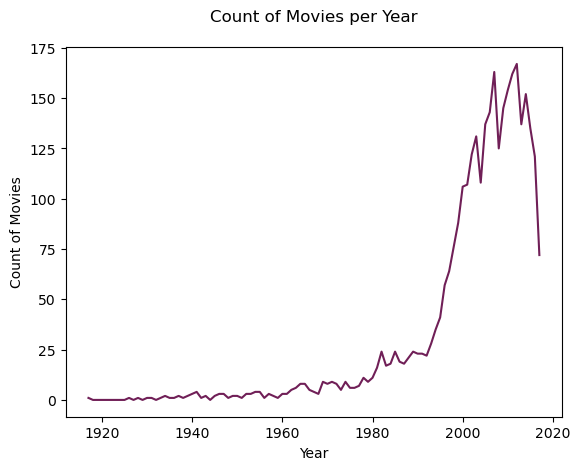

In [174]:
sns.lineplot(data=movies_per_year,
            x='release_date',
            y='title',
            color = '#701f57')

plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.title('Count of Movies per Year\n')

plt.show()

There are very few films from 1920 to 1960. The count of movies released per year then increased between 1960 and 1990, then increased sharply from 1990 onwards. The highest number of movies released in a year recorded in this dataset was in 2011. The sharp drop in movies released in 2016 may be because the data only goes up until September 2016.

>**Insight 2:** 2011 was the year with the largest number of movie releases.

Let's zoom in to 2011.

### 2011 <a class="anchor" id="2.4"></a>

In [163]:
# apply a mask to find movies released in 2011
#https://stackoverflow.com/questions/46878156/pandas-filter-dataframe-rows-with-a-specific-year
movies_2011 = released[released['release_date'].dt.year == 2011]

It would be interesting to look at the most popular genres of 2011 and how that compares to the revenue.  
First, we could produce a count for the genres.

In [166]:
# produce a list that includes all the genres in each row of the extracted_genres column
all_genres = [genre for genres_list in movies_2011['extracted_genres'] for genre in genres_list]

# count the number of occurences of each genre 
genre_count_2011 = pd.Series(all_genres).value_counts()

Sum the revenue for each genre.

In [169]:
#split the extracted_genres list and group by genres, then sum the revenue for each genre
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
rev_by_gen_2011 = movies_2011.explode('extracted_genres').groupby('extracted_genres')['revenue'].sum()

# sort 
genre_count_2011 = genre_count_2011.sort_index()

Produce a combined chart showing count and revenue for each genre.

C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



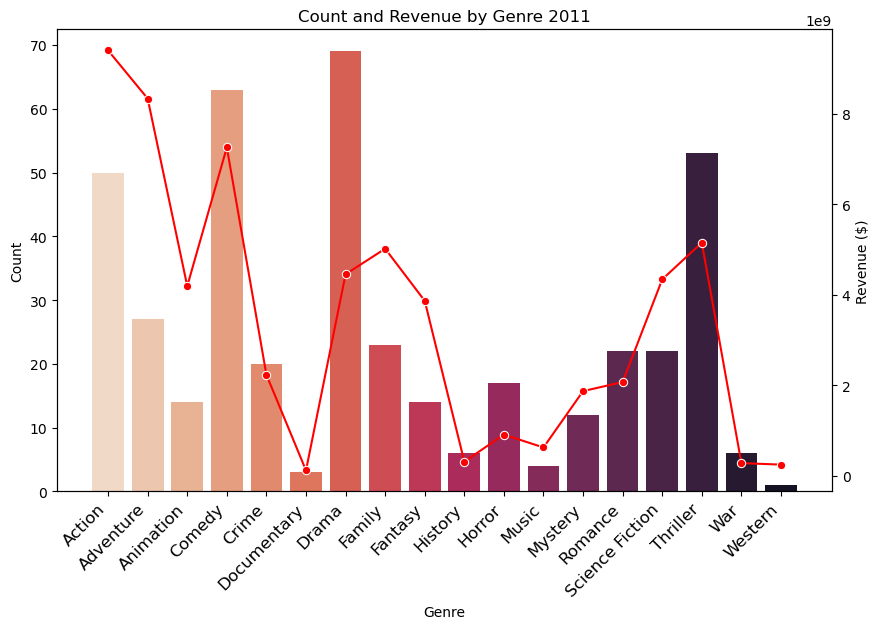

In [236]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# put count on primary axis
# make barplot
sns.barplot(x=genre_count_2011.index, 
            y=genre_count_2011.values, 
            ax=ax1,
           palette = 'rocket_r')

ax1.set_ylabel('Count')
ax1.set_xlabel('Genre')
ax1.set_title('Count and Revenue by Genre 2011')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

# Create a secondary y-axis for revenue
ax2 = ax1.twinx()
# make a lineplot
sns.lineplot(x=rev_by_gen_2011.index, 
             y=rev_by_gen_2011.values,
             marker='o', ax=ax2, 
             color='red')
ax2.set_ylabel('Revenue ($)')


plt.show()

We can see that though drama was the most popular movie genre of 2011, it was not in the top 3 genres that generated the most revenue. 
Action, adventure, and comedy were the top 3 for revenue.

>**Insight 3:** Drama was the most popular genre of 2011, but did not generate the most revenue. Action produced the most revenue.

Let's look a bit closer at revenue.

In [178]:
# split the extracted_genres list so that each list item is on a new row
movies_rev_explode_2011 = movies_2011.explode('extracted_genres')

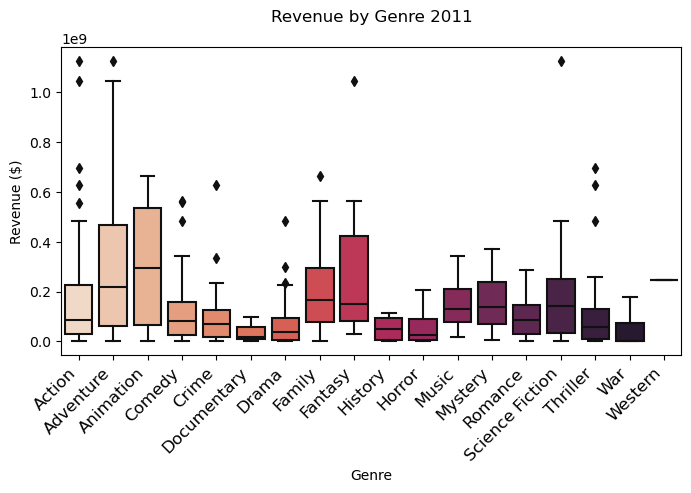

In [234]:
plt.figure(figsize=(8, 4))

# make a boxplot for revenue for each genre
sns.boxplot(data=movies_rev_explode_2011, 
            x='extracted_genres', 
            y='revenue', 
            order = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western' ],
           palette = 'rocket_r')

plt.xlabel('Genre')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Genre 2011\n')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.show()

It seems that the median for action films is lower than expected for the top performing genre of 2011, indicating that most action films did not produce much revenue, but there were several outliers that greatly outperformed to raise the total revenue value for action films.

>**Insight 4:** The median revenue for action films in 2011 was relatively small. Several action films outperformed, leading to a large total revenue.

### Select Two Movies <a class="anchor" id="2.5"></a>

Next, let's look at the top grossing movie of 2011 and the top grossing movie overall. 

In [186]:
# find top grossing movie of 2011
movies_2011.sort_values(['revenue'],ascending=False).head(1)

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,extracted_genres,extract_production_comp,extract_production_countries,extract_spoken_languages,extract_keywords
52,195000000,38356,en,Transformers: Dark of the Moon,28.529607,2011-06-28,1123746996,154.0,Released,Transformers: Dark of the Moon,6.1,3299,"[Action, Science Fiction, Adventure]","[Paramount Pictures, Di Bonaventura Pictures, ...",[United States of America],[English],"[moon, spacecraft, traitor, bodyguard, alien p..."


In [188]:
# find top grossing movie overall
df_nn.sort_values(['revenue'],ascending=False).head(1)

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,extracted_genres,extract_production_comp,extract_production_countries,extract_spoken_languages,extract_keywords
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]","[culture clash, future, space war, space colon..."


>**Insight 5:** The top grossing movie of 2011 was Transformers: Dark of the Moon. The top grossing film overall was Avatar.

Let's make a dataframe with just these two movies.

In [192]:
# make dataframe with just avatar and transformers: dark of the moon
selected_movies = df_nn[(df_nn['id']== 38356) | (df_nn['id']== 19995)].copy()

Let's add a profit column, where profit is revenue minus budget.

In [195]:
selected_movies['profit'] = selected_movies['revenue'] - selected_movies['budget']

In [197]:
selected_movies

,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,extracted_genres,extract_production_comp,extract_production_countries,extract_spoken_languages,extract_keywords,profit
0,237000000,19995,en,Avatar,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[English, Español]","[culture clash, future, space war, space colon...",2550965087
52,195000000,38356,en,Transformers: Dark of the Moon,28.529607,2011-06-28,1123746996,154.0,Released,Transformers: Dark of the Moon,6.1,3299,"[Action, Science Fiction, Adventure]","[Paramount Pictures, Di Bonaventura Pictures, ...",[United States of America],[English],"[moon, spacecraft, traitor, bodyguard, alien p...",928746996


#### Budget, Revenue, and Profit <a class="anchor" id="2.5.1"></a>

Let's compare the budget, revenue, and profit of both films in a radar chart.

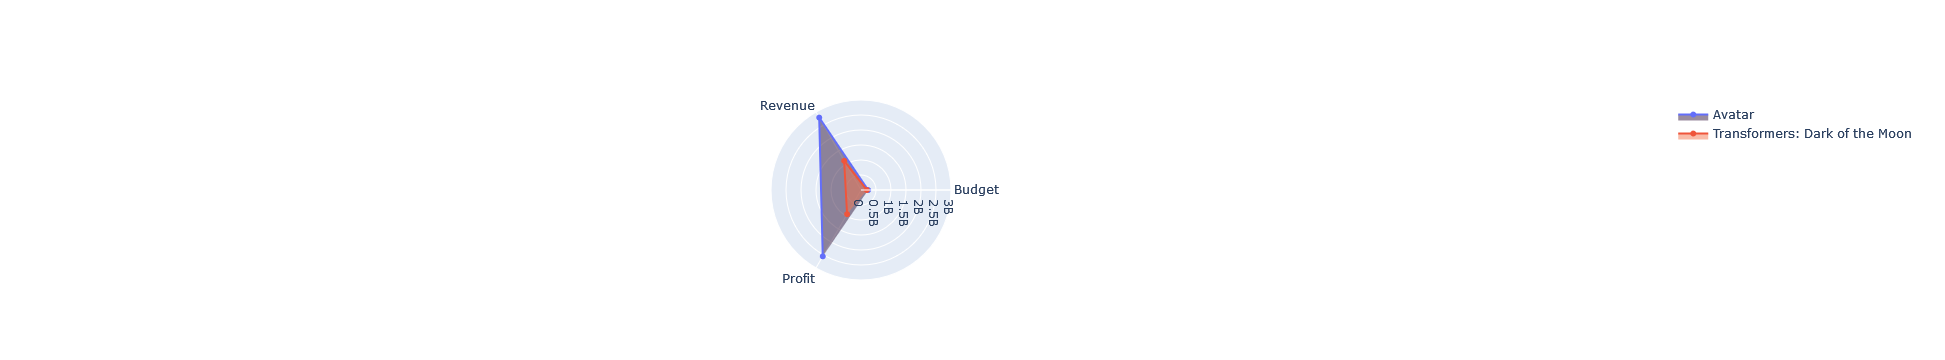

In [230]:
fig = go.Figure()

# labels for each point of the chart
categories = ["Budget", "Revenue", "Profit"]

fig.add_trace(go.Scatterpolar(
        r=[237000000, 2787965087, 2550965087], # values for Avatar
        theta=categories,
        fill='toself',
        fillcolor= 'rgba(53,25,62,0.5)',
        name='Avatar'
    ))

fig.add_trace(go.Scatterpolar(
        r=[195000000, 1123746996, 928746996], # values for Transformers
        theta=categories,
        fill='toself',
        fillcolor= 'rgba(243,118,81,0.5)',
        name='Transformers: Dark of the Moon'
    ))

# Define layout for the radar chart
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3000000000]
    )),
  showlegend=True
)

# Display the chart
fig.show()

>**Insight 6:** The movies had a similar budget, but Avatar produced more than double the revenue, leading to vastly different profits.

#### Comparison Against Movies with Similar Genres <a class="anchor" id="2.5.2"></a>

What affects revenue? Let's compare the movies against other movies that also have the Action, Adventure, and Science Fiction genres listed.  

To look for movies containing the genres we want, we can use regex.

In [209]:
# produce a string of the genres
#https://stackoverflow.com/questions/5618878/how-to-convert-list-to-string
df_nn['genres_str'] = [' '.join(str(genre) for genre in genre_list) for genre_list in df_nn['extracted_genres']]

In [211]:
# define the regex pattern we are trying to match
pattern = '.*Action.*Adventure.*Science Fiction.*|.*Adventure.*Science Fiction.*Action|.*Science Fiction.*Action.*Adventure|.*Action.*Science Fiction.*Adventure.*|.*Science Fiction.*Adventure.*Action.*|.*Adventure.*Action.*Science Fiction.*'

# produce a dataframe with these genres
sim_by_gen = df_nn[df_nn['genres_str'].str.contains(pattern, regex=True)]

Produce a graph of budget vs revenue.

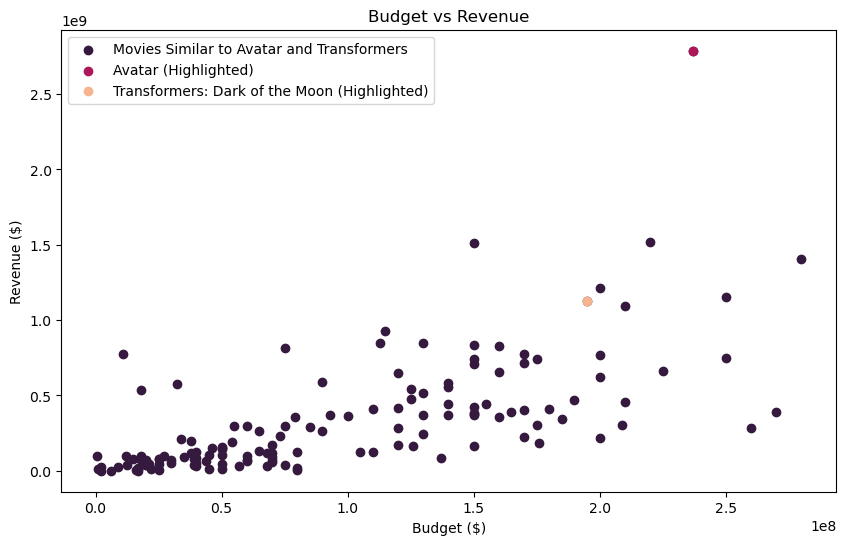

In [265]:
highlight_title_1 = 'Avatar'
highlight_title_2 = 'Transformers: Dark of the Moon'
highlight_data_1 = sim_by_gen[sim_by_gen['original_title'] == highlight_title_1]
highlight_data_2 = sim_by_gen[sim_by_gen['original_title'] == highlight_title_2]

# Create scatter plot of budget against popularity
plt.figure(figsize=(10, 6))
plt.scatter(sim_by_gen['budget'], sim_by_gen['revenue'], label='Movies Similar to Avatar and Transformers', color='#35193e')
plt.scatter(highlight_data_1['budget'], highlight_data_1['revenue'], label=f'{highlight_title_1} (Highlighted)', color='#ad1759')
plt.scatter(highlight_data_2['budget'], highlight_data_2['revenue'], label=f'{highlight_title_2} (Highlighted)', color='#f6b48f')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget vs Revenue')
plt.legend()
plt.show()

It seems that a higher budget leads to a higher revenue. Transformers: Dark of the Moon produced as much revenue as expected of a movie of that budget, but Avatar has outperformed. Perhaps more of Avatar's budget was spent on advertising? There isn't a way to tell with this data.

>**Insight 7:** Budget is positively correlated with revenue. Transformers: Dark of the Moon follows the trend, but Avatar outperforms. 

Next let's look at popularity vs revenue.

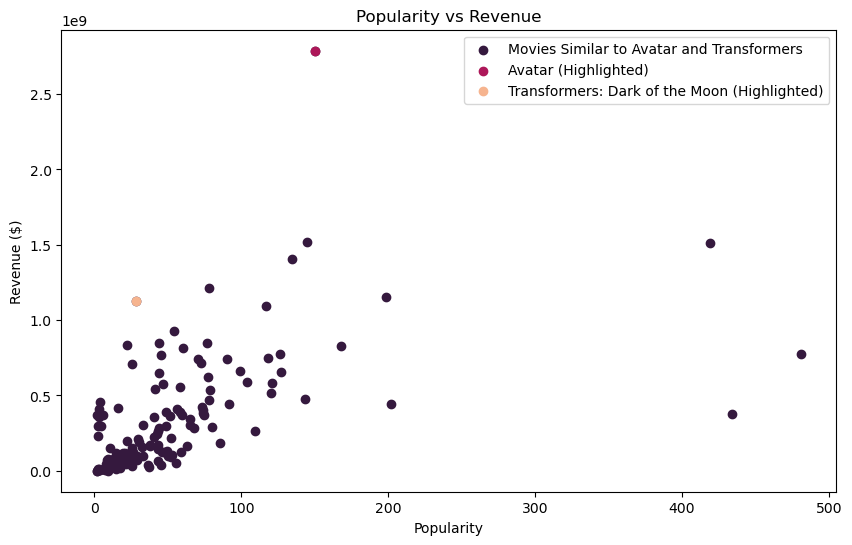

In [267]:
highlight_title_1 = 'Avatar'
highlight_title_2 = 'Transformers: Dark of the Moon'
highlight_data_1 = sim_by_gen[sim_by_gen['original_title'] == highlight_title_1]
highlight_data_2 = sim_by_gen[sim_by_gen['original_title'] == highlight_title_2]

# Create scatter plot of budget against popularity
plt.figure(figsize=(10, 6))
plt.scatter(sim_by_gen['popularity'], sim_by_gen['revenue'], label='Movies Similar to Avatar and Transformers', color='#35193e')
plt.scatter(highlight_data_1['popularity'], highlight_data_1['revenue'], label=f'{highlight_title_1} (Highlighted)', color='#ad1759')
plt.scatter(highlight_data_2['popularity'], highlight_data_2['revenue'], label=f'{highlight_title_2} (Highlighted)', color='#f6b48f')
plt.xlabel('Popularity')
plt.ylabel('Revenue ($)')
plt.title('Popularity vs Revenue')
plt.legend()
plt.show()

>**Insight 8:** Popularity is positively correlated with revenue. Both Avatar and Transformers: Dark of the Moon produced more revenue than their popularity would suggest, but again, Avatar vastly outperforms.

## Conclusions <a class="anchor" id="3"></a>

### Data Insights <a class="anchor" id="3.1"></a>
- Over 25% of the data has either $0 for budget or revenue, or 0 minutes for runtime. In the context of movies, this data is unreliable.
- 2011 was the year with the largest number of movie releases.
- Drama was the most produced genre of 2011, but did not generate the most revenue. Action produced the most revenue.
- The median revenue for action films in 2011 was relatively small. Several action films outperformed, leading to a large total revenue.
- The top grossing movie of 2011 was Transformers: Dark of the Moon. The top grossing film overall was Avatar.
- Avatar and Transformers: Dark of the Moon had a similar budget, but Avatar produced more than double the revenue, leading to a much larger profit for Avatar.
- Budget is positively correlated with revenue. Transformers: Dark of the Moon follows the trend, but Avatar outperforms, producing more revenue than expected for the budget allocated.
- Both Avatar and Transformers: Dark of the Moon produced more revenue than their popularity would suggest, but Avatar yet again outperformed.